In [2]:
import pandas as pd
data_frame = pd.read_csv('FIFA23_official_data.csv')

data_frame.describe()


,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Kit Number
count,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17625.000000
mean,246319.424462,23.127746,63.369592,70.981200,1537.915855,1.106285,2.900340,2.297169,25.037957
std,31487.892861,4.639821,8.036268,6.529836,285.893809,0.407021,0.663523,0.754264,19.154116
min,16.000000,15.000000,43.000000,42.000000,749.000000,1.000000,1.000000,1.000000,1.000000
25%,240732.500000,20.000000,58.000000,67.000000,1387.000000,1.000000,3.000000,2.000000,11.000000
50%,257041.000000,22.000000,63.000000,71.000000,1548.000000,1.000000,3.000000,2.000000,22.000000
75%,263027.500000,26.000000,69.000000,75.000000,1727.000000,1.000000,3.000000,3.000000,32.000000
max,271340.000000,54.000000,91.000000,95.000000,2312.000000,5.000000,5.000000,5.000000,99.000000


In [3]:
data_frame.values

array([[209658, 'L. Goretzka', 27, ..., '€157M', 8.0, nan],
       [212198, 'Bruno Fernandes', 27, ..., '€155M', 8.0, nan],
       [224334, 'M. Acuña', 30, ..., '€97.7M', 19.0, nan],
       ...,
       [270567, 'A. Demir', 25, ..., '€142K', 12.0, nan],
       [256624, '21\xa0S. Czajor', 18, ..., '€214K', 40.0, nan],
       [256376, '21\xa0F. Jakobsson', 20, ..., '€131K', 30.0, nan]],
      shape=(17660, 29), dtype=object)

In [4]:
data_frame[data_frame['Age']>40].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
2277,115909,Rubén Castro,41,https://cdn.sofifa.net/players/115/909/23_60.png,Spain,https://cdn.sofifa.net/flags/es.png,73,73,Málaga CF,https://cdn.sofifa.net/teams/573/30.png,...,No,"<span class=""pos pos26"">LS","Jul 6, 2022",NaN,2023,169cm,68kg,NaN,24.0,NaN
3143,153260,21 Hilton,42,https://cdn.sofifa.net/players/153/260/21_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,75,75,Montpellier Hérault SC,https://cdn.sofifa.net/teams/70/30.png,...,Yes,"<span class=""pos pos4"">RCB","Aug 1, 2011",NaN,2021,180cm,78kg,NaN,4.0,NaN
3529,152912,J. Sand,41,https://cdn.sofifa.net/players/152/912/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,74,74,Club Atlético Lanús,https://cdn.sofifa.net/teams/110395/30.png,...,No,"<span class=""pos pos24"">RS","Jan 21, 2019",NaN,2022,182cm,79kg,NaN,9.0,NaN
11116,265721,M. Galezo,41,https://cdn.sofifa.net/players/265/721/23_60.png,Venezuela,https://cdn.sofifa.net/flags/ve.png,64,64,Hermanos Colmenarez,https://cdn.sofifa.net/teams/115694/30.png,...,No,"<span class=""pos pos28"">SUB","Jan 1, 2020",NaN,2022,180cm,78kg,NaN,2.0,NaN
15062,2431,09 A. Fontana,41,https://cdn.sofifa.net/players/002/431/09_60.png,Italy,https://cdn.sofifa.net/flags/it.png,77,78,Palermo,https://cdn.sofifa.net/teams/1843/30.png,...,No,"<span class=""pos pos28"">SUB",NaN,NaN,2009,185cm,73kg,NaN,12.0,NaN


In [5]:
df1 = pd.DataFrame(data_frame, columns=['Name','Age','Wage','Value'])

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

df1['Wage'] = df1['Wage'].replace('[\€,]','',regex=True).apply(value_to_float)
df1['Value'] = df1['Value'].replace('[\€,]','',regex=True).apply(value_to_float)

df1['Diff'] = df1['Value'] - df1['Wage']
df1.sort_values('Diff', ascending=False)

,Name,Age,Wage,Value,Diff
75,K. Mbappé,23,230000.0,190500000.0,190270000.0
180,E. Haaland,21,220000.0,148000000.0,147780000.0
17,F. de Jong,25,230000.0,116500000.0,116270000.0
214,Pedri,19,115000.0,116000000.0,115885000.0
25,M. Salah,30,270000.0,115500000.0,115230000.0
...,...,...,...,...,...
8455,14 Índio,38,20000.0,0.0,-20000.0
2031,14 J. Zanetti,39,45000.0,1000.0,-44000.0
199,R. Kent,40,45000.0,0.0,-45000.0
1287,14 R. Giggs,39,60000.0,1000.0,-59000.0


<Axes: xlabel='Wage', ylabel='Value'>

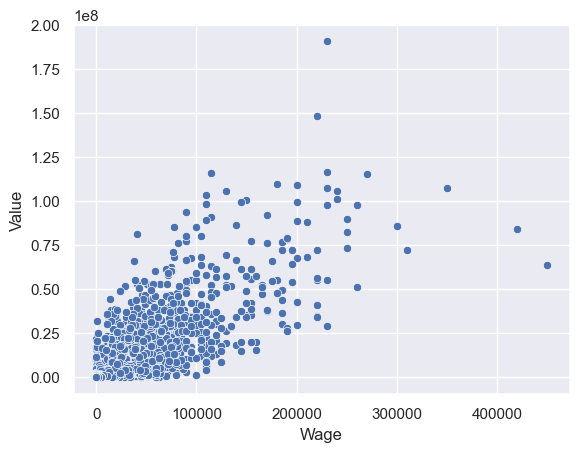

In [6]:
import seaborn as sns
# import matplotlib.pyplot as plt
sns.set()

graph = sns.scatterplot(x='Wage', y='Value', data=df1)
graph
# plt.show()

In [7]:
from bokeh.plotting import figure,show
from bokeh.models import HoverTool

TOOLTIPS = HoverTool (tooltips=[
    ("index", "$index"),
    ("(Wage, Value)", "(@Wage, @Value)"),
    ("Name", "@Name")
])
p = figure(title="FIFA 2023", x_axis_label='Wage', y_axis_label='Value', width= 700, height = 700, tools=[TOOLTIPS])
p.circle('Wage','Value', size = 10, source=df1)

show(p)